<a href="https://colab.research.google.com/github/pande1sachin/Capstone-Project---Machine-Learning---Unsupervised-ML---Netflix-Movies-and-TV-Shows-Clustering/blob/main/Individual_Copy_(Sachin_Pande)_%7C_Capstone_Project_%7C_Machine_Learning_Unsupervised_ML_Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Machine Learning - Unsupervised ML - Netflix Movies and TV Shows Clustering



##### **Project Type** - Unsupervised Machine Learning
##### **Contribution** - Individual
##### **Team Member 1 -** Sachin Pande

# **Project Summary -**

The purpose of this project is to thoroughly examine the array of movies and TV series offered by Netflix, which was obtained from the external search platform Flixable, and categorize them into pertinent groups. It aims to enrich user engagement and curb customer turnover for Netflix, the leading online streaming giant, which presently boasts more than 220 million subscribers as of the second quarter of 2022. The dataset comprises films and TV programs up to the year 2019, and our goal is to delve into this data to unearth fresh insights and patterns in the swiftly expanding realm of streaming media entertainment.

Our dataset initially consisted of approximately 7787 entries and encompassed 12 distinct attributes. Our initial steps involved rectifying missing data points and embarking on exploratory data analysis (EDA) to gain a comprehensive understanding of the data.

We employed a range of attributes, namely cast, country, genre, director, rating, and description, to create distinct clusters. To achieve this, we utilized the TFIDF vectorizer to tokenize, preprocess, and vectorize the values associated with these attributes. Furthermore, we addressed the issue of high dimensionality by employing Principal Component Analysis (PCA) techniques.

Utilizing various methodologies such as the elbow method, silhouette score, dendrogram analysis, among others, we developed two distinct types of clusters using the K-Means Clustering and Agglomerative Hierarchical clustering algorithms, respectively. Through these methods, we determined the optimal number of clusters to enhance the clustering accuracy.

The generated similarity matrix, derived from applying cosine similarity calculations, played a pivotal role in constructing a content-based recommender system. This system will offer users ten personalized recommendations based on their viewing preferences, thereby enhancing their overall streaming experience.

# **GitHub Link -**

https://github.com/pande1sachin/Capstone-Project---Machine-Learning---Unsupervised-ML---Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


Netflix, as of 2022-Q2, boasts over 220 million subscribers and is the world's leading provider of online streaming services. To prevent subscriber churn and improve user experience, it is essential for them to effectively group the shows available on their platform into clusters.

Through clustering, we can discern similarities and differences between shows, enabling us to provide personalized show recommendations tailored to individual preferences.

The objective of this project is to categorize Netflix shows into distinct clusters, ensuring that shows within the same cluster share similarities while those in different clusters exhibit differences.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [43]:
# Libraries important for the project are imported

# libraries that are important for data analysis and visualization are imported
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

# This library is used to visualize missing values
import missingno as msno

# Libraries important for processing textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# libraries used to construct a recommendation system are imported
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# libraries used to implement clusters are imported
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Dataset Loading

In [44]:
# Mounting drive in colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
# Load Dataset
net_flix = pd.read_csv('/content/drive/MyDrive/AlmaBetter Projects/Module VI - Capstone Project - Introduction to Machine Learning/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
net_flix_df = net_flix.copy() #Creating a copy of original dataframe so as to keep original dataframe intact

### Dataset First View

In [106]:
# Dataset First Look

net_flix_df.head(10)  # first 10 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [107]:
# Dataset First Look

net_flix_df.tail(10)  # Last 10 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [108]:
# Dataset Rows & Columns count
print(f'number of rows : {net_flix_df.shape[0]}') # Prints number of rows
print(f'number of columns : {net_flix_df.shape[1]}') # Prints number of columns

number of rows : 7787
number of columns : 12


### Dataset Information

In [109]:
# Dataset Info
net_flix_df.info() # Displays information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [110]:
# Dataset Duplicate Value Count
duplicate_values = len(net_flix_df[net_flix_df.duplicated()]) # Assigns the number of duplicate values to the variable on LHS
print("The number of duplicate values in the data set is: ", duplicate_values)

The number of duplicate values in the data set is:  0


Hence from the above results we can say that the dataset does not have any duplicate values.

#### Missing Values/Null Values

In [111]:
# Missing Values/Null Values Count
print("Null values in each column")
print(net_flix_df.isna().sum())
print("\n\n")

# Percentage of null values in each category
print("Percentage of null values in each Column: ")
null_count_by_column = net_flix_df.isnull().sum()/len(net_flix_df)*100
print(f"{null_count_by_column}")
print("\n\n")

Null values in each column
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64



Percentage of null values in each Column: 
show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64





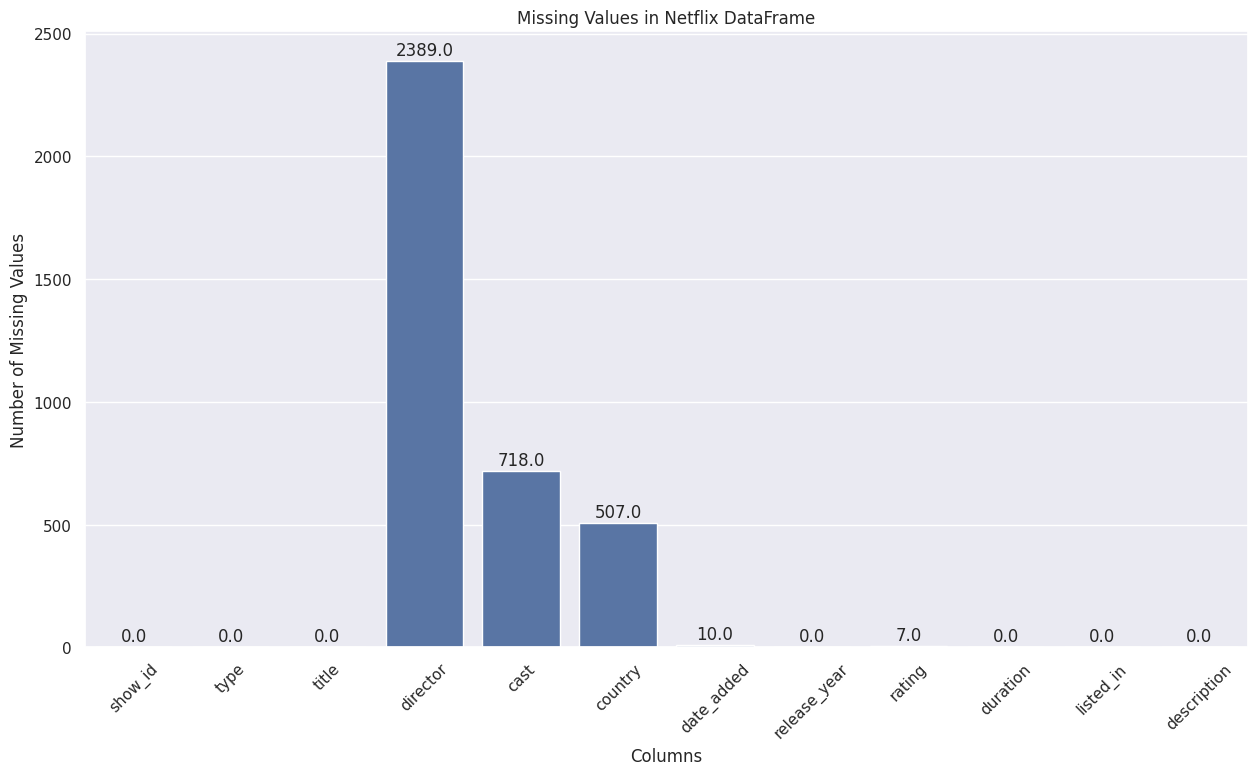

In [112]:
# Visualizing the missing values
plt.figure(figsize=(15,8))
plots= sns.barplot(x= net_flix_df.columns, y= net_flix_df.isna().sum())

for bar in plots.patches:
      plots.annotate(bar.get_height(), (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='center', size=12, xytext=(0, 8), textcoords='offset points')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Netflix DataFrame')
plt.xticks(rotation=45)
plt.show()

### What did you know about your dataset?

The dataset comprises of 12 columns.

The dataset does not have any duplicate values.

director, cast, country, date_added, and rating are five columns which have null values.

The dataset can be used to build clustring models based on country, rating, genre

## ***2. Understanding Your Variables***

In [113]:
# Dataset Columns
print(f"Columns:\n{net_flix_df.columns}")

Columns:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [114]:
# Dataset Describe
net_flix_df.describe(include='all').T   # Gives basic stastical description of the dataset and displays it in transpose manner

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

1. **show_id**: Unique identifier for each movie/show.

2. **type**: Indicates whether the entry is a movie or a TV show.
3. **title**: Name of the movie or TV show.
4. **director**: Name of the director(s) of the movie or TV show.
5. **cast**: Names of the actors and actresses featured in the movie or TV show.
6. **country**: Country or countries where the movie or TV show was produced.
7. **date_added**: Date when the movie or TV show was added to Netflix.
8. **release_year**: Year when the movie or TV show was released.
9. **rating**: TV rating or movie rating of the movie or TV show.
10. **duration**: Length of the movie or TV show in minutes or seasons.
11. **listed_in**: Categories or genres of the movie or TV show.
12. **description**: Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [115]:
# Check Unique Values for each variable.
for column in net_flix_df.columns:
  print(f"Unique values in {column} is: {net_flix_df[column].nunique()}")

Unique values in show_id is: 7787
Unique values in type is: 2
Unique values in title is: 7787
Unique values in director is: 4049
Unique values in cast is: 6831
Unique values in country is: 681
Unique values in date_added is: 1565
Unique values in release_year is: 73
Unique values in rating is: 14
Unique values in duration is: 216
Unique values in listed_in is: 492
Unique values in description is: 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

##Handling Missing/Null Values from each column

We have already seen that columns having missing and null values are director, cast, country, date_added, and rating.

In [116]:
# Checking columns for null values
print(f"Total Rows: {len(net_flix_df)}\n")   #Print total number of rows in dataset

# Print total number of rows having null/missing values in 'date_added' column
print(f"Number of rows having missing values in 'director' column: {net_flix_df['director'].isna().sum()}")
print(f"%age of missing values in 'director' column: {net_flix_df['director'].isnull().sum()/len(net_flix_df)*100:.2f} %\n")

# Print total number of rows having null/missing values in 'date_added' column
print(f"Number of rows having missing values in 'cast' column: {net_flix_df['cast'].isna().sum()}")
print(f"%age of missing values in 'cast' column: {net_flix_df['cast'].isnull().sum()/len(net_flix_df)*100:.2f} %\n")

# Print total number of rows having null/missing values in 'date_added' column
print(f"Number of rows having missing values in 'country' column: {net_flix_df['country'].isna().sum()}")
print(f"%age of missing values in 'country' column: {net_flix_df['country'].isnull().sum()/len(net_flix_df)*100:.2f} %\n")

# Print total number of rows having null/missing values in 'date_added' column
print(f"Number of rows having missing values in 'date_added' column: {net_flix_df['date_added'].isna().sum()}")
print(f"%age of missing values in 'date_added' column: {net_flix_df['date_added'].isnull().sum()/len(net_flix_df)*100:.2f} %\n")

# Print total number of rows having null/missing values in 'rating' column
print(f"Number of rows having missing values in 'rating' column: {net_flix_df['rating'].isna().sum()}")
print(f"%age of missing values in 'rating' column: {net_flix_df['rating'].isnull().sum()/len(net_flix_df)*100:.2f} %")

Total Rows: 7787

Number of rows having missing values in 'director' column: 2389
%age of missing values in 'director' column: 30.68 %

Number of rows having missing values in 'cast' column: 718
%age of missing values in 'cast' column: 9.22 %

Number of rows having missing values in 'country' column: 507
%age of missing values in 'country' column: 6.51 %

Number of rows having missing values in 'date_added' column: 10
%age of missing values in 'date_added' column: 0.13 %

Number of rows having missing values in 'rating' column: 7
%age of missing values in 'rating' column: 0.09 %


From above it is clear that columns date_added, and rating have very less missing/null values, so we can remove the rows where missing/null values are present in these two columns as removing the will affect our dataset also imputing any other value in these columns will increase biasness of our dataset.

But before removing these rows we will handle missing/null values of director, cast and country columns as these columns have approximately 31%, 9%, 7% null/missing values.

We cannot drop or impute any values in 'director' and 'cast' as the null percentage is comparatevely high and we do not know data of those actual movie/TV shows, so its better to replace those entries with 'unknown'.

We can fill null values of 'country' with mode as we only have around 7% null values and most of the movies/shows are from US only.

In [117]:
net_flix_df[['director','cast']]= net_flix_df[['director','cast']].fillna("Unknown")      # Replacing missing/null values with 'Unknown'.
net_flix_df['country']= net_flix_df['country'].fillna(net_flix_df['country'].mode()[0])   # Replacing missing/null values with mode

In [118]:
# Dropping all remaining null values of date_added and rating
net_flix_df.dropna(axis=0, inplace=True)

In [119]:
# Rechecking dataset for null values after handling them

print(f"Total Rows: {len(net_flix_df)}\n")   #Print total number of rows in dataset

# Print total number of rows having null/missing values in 'date_added' column
print(f"Number of rows having missing values in 'director' column: {net_flix_df['director'].isna().sum()}")
print(f"%age of missing values in 'director' column: {net_flix_df['director'].isnull().sum()/len(net_flix_df)*100:.2f} %\n")

# Print total number of rows having null/missing values in 'date_added' column
print(f"Number of rows having missing values in 'cast' column: {net_flix_df['cast'].isna().sum()}")
print(f"%age of missing values in 'cast' column: {net_flix_df['cast'].isnull().sum()/len(net_flix_df)*100:.2f} %\n")

# Print total number of rows having null/missing values in 'date_added' column
print(f"Number of rows having missing values in 'country' column: {net_flix_df['country'].isna().sum()}")
print(f"%age of missing values in 'country' column: {net_flix_df['country'].isnull().sum()/len(net_flix_df)*100:.2f} %\n")

# Print total number of rows having null/missing values in 'date_added' column
print(f"Number of rows having missing values in 'date_added' column: {net_flix_df['date_added'].isna().sum()}")
print(f"%age of missing values in 'date_added' column: {net_flix_df['date_added'].isnull().sum()/len(net_flix_df)*100:.2f} %\n")

# Print total number of rows having null/missing values in 'rating' column
print(f"Number of rows having missing values in 'rating' column: {net_flix_df['rating'].isna().sum()}")
print(f"%age of missing values in 'rating' column: {net_flix_df['rating'].isnull().sum()/len(net_flix_df)*100:.2f} %")

Total Rows: 7770

Number of rows having missing values in 'director' column: 0
%age of missing values in 'director' column: 0.00 %

Number of rows having missing values in 'cast' column: 0
%age of missing values in 'cast' column: 0.00 %

Number of rows having missing values in 'country' column: 0
%age of missing values in 'country' column: 0.00 %

Number of rows having missing values in 'date_added' column: 0
%age of missing values in 'date_added' column: 0.00 %

Number of rows having missing values in 'rating' column: 0
%age of missing values in 'rating' column: 0.00 %


Some movies/TV shows that were filmed in multiple countries, have multiple genres associated with it. lets find out them.

In [120]:
# Find entries with multiple genres
multiple_genres = net_flix_df[net_flix_df['listed_in'].str.contains(',', na=False)]

# Print movies/TV shows with multiple genres
print("\nMovies/TV Shows with Multiple Genres:")
multiple_genres[['title', 'listed_in']]


Movies/TV Shows with Multiple Genres:


,title,listed_in
0,3%,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,7:19,"Dramas, International Movies"
2,23:59,"Horror Movies, International Movies"
3,9,"Action & Adventure, Independent Movies, Sci-Fi..."
5,46,"International TV Shows, TV Dramas, TV Mysteries"
...,...,...
7782,Zozo,"Dramas, International Movies"
7783,Zubaan,"Dramas, International Movies, Music & Musicals"
7784,Zulu Man in Japan,"Documentaries, International Movies, Music & M..."
7785,Zumbo's Just Desserts,"International TV Shows, Reality TV"


In [121]:
# Find entries with multiple countries
multiple_countries = net_flix_df[net_flix_df['country'].str.contains(',', na=False)]

# Print movies/TV shows with multiple countries
print("Movies/TV Shows Filmed in Multiple Countries:")
multiple_countries[['title', 'country']]

Movies/TV Shows Filmed in Multiple Countries:


,title,country
11,1983,"Poland, United States"
17,22-Jul,"Norway, Iceland, United States"
48,10 Days in Sun City,"South Africa, Nigeria"
50,"10,000 B.C.","United States, South Africa"
54,100 Meters,"Portugal, Spain"
...,...,...
7759,Zak Storm,"United States, France, South Korea, Indonesia"
7761,Zapped,"Canada, United States"
7770,Zinzana,"United Arab Emirates, Jordan"
7782,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar..."


Let us consider only the primary country where that respective movie / TV show was filmed. Also, let's consider only the primary genre of the respective movie / TV show.

In [122]:
# Function to extract the primary value
def extract_primary(value):
    if isinstance(value, str):
        return value.split(',')[0]
    return value

# Apply the function to 'country' and 'listed_in' columns
net_flix_df['country'] = net_flix_df['country'].apply(extract_primary)
net_flix_df['listed_in'] = net_flix_df['listed_in'].apply(extract_primary)

# Print the DataFrame with simplified values
net_flix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,TV-MA,99 min,Dramas,When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,Documentaries,"In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,International TV Shows,Dessert wizard Adriano Zumbo looks for the nex...


### date_added:

In [123]:
# Typecasting 'date_added' from string to datetime as it was originally of string type
net_flix_df["date_added"] = pd.to_datetime(net_flix_df['date_added'])

In [124]:
# checking range of  dates on which a show was added on Netflix
print(f"Movies and shows from {net_flix_df.date_added.min().date()}\
 to {net_flix_df.date_added.max().date()} are included in the dataset")

Movies and shows from 2008-01-01 to 2021-01-16 are included in the dataset


Shows between 1st January 2008 and 16th January 2021 are included in the dataset.

In [125]:
# Adding new attributes day,  month and year of date added
net_flix_df['day_added'] = net_flix_df['date_added'].dt.day
net_flix_df['month_added'] = net_flix_df['date_added'].dt.month
net_flix_df['year_added'] = net_flix_df['date_added'].dt.year

In [126]:
net_flix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...,14,8,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,23,12,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",20,12,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",16,11,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020


###Rating:

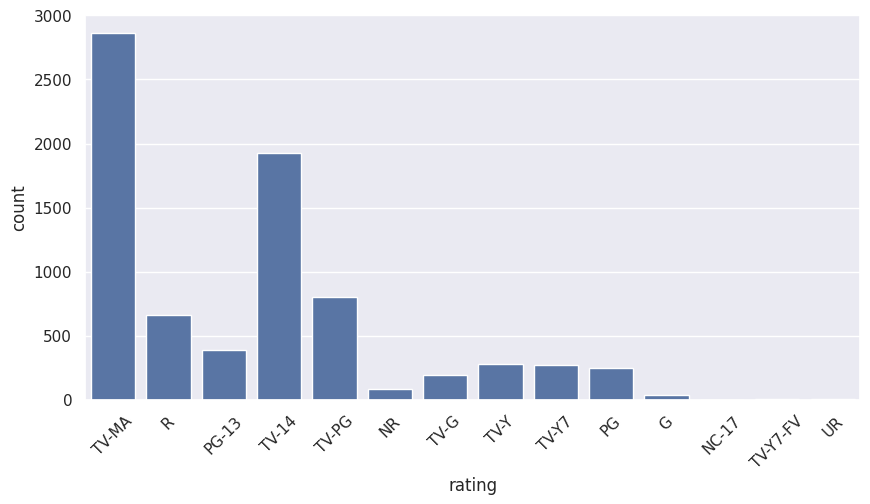

In [127]:
# Ratings as per age for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data= net_flix_df)
plt.xticks(rotation= 45)
plt.show()

Most shows in the dataset are rated as TV-MA, followed by TV-14 and TV-PG

In [128]:
# Age ratings
net_flix_df.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [129]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

net_flix_df['rating'].replace(rating_map, inplace = True)
net_flix_df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

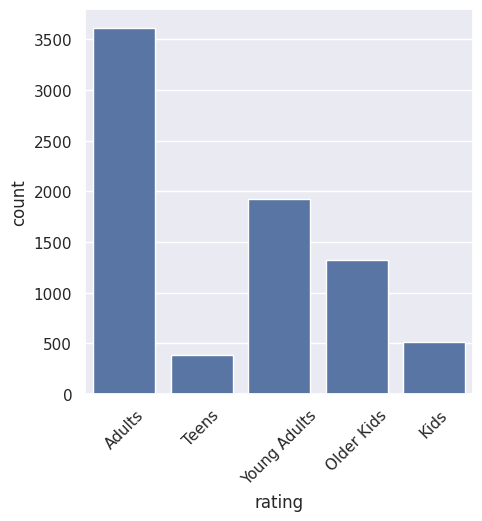

In [130]:
# Ratings as per age for shows in the dataset
plt.figure(figsize=(5,5))
sns.countplot(x='rating',data= net_flix_df)
plt.xticks(rotation= 45)
plt.show()

In [131]:
Total_Rows= len(net_flix_df)

rating_dict= net_flix_df['rating'].value_counts().to_dict()
for key, value in rating_dict.items():
  percentage= value/Total_Rows*100
  print(f"{percentage:.2f}% are {key} movies/shows")

46.55% are Adults movies/shows
24.81% are Young Adults movies/shows
17.08% are Older Kids movies/shows
6.59% are Kids movies/shows
4.97% are Teens movies/shows


Around 47% of shows on Netflix are produced for adult audience. Followed by young adults, older kids and kids. Netflix has the least number of shows that are specifically produced for teenagers than other age groups.

Duration

In [132]:
# Splitting the duration column, and changing the datatype to integer
net_flix_df['duration'] = net_flix_df['duration'].apply(lambda x: int(x.split()[0]))

# Number of seasons for tv shows
print(net_flix_df[net_flix_df['type']=='TV Show'].duration.value_counts())

# Movie length in minutes
print(net_flix_df[net_flix_df['type']=='Movie'].duration.unique())

# datatype of duration
print('\n')
print('Converted data type of duration column: ', net_flix_df.duration.dtype)

1     1606
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64
[ 93  78  80 123  95 119 118 143 103  89  91 149 144 124  87 110 128 117
 100  84  99  90 102 104 105  56 125  81  97 106 107 109  44  75 101 113
 114 130  94 140 135  82  70 121  92 164  53  83 116  86 120  96 126 129
  77 137 148  28 122 176  85  22  68 111  29 142 168  21  59  20  98 108
  76  26 156  30  57 150 133 115 154 127 146 136  88 131  24 112  74  63
  38  25 174  60 153 158 151 162  54  51  69  64 147  42  79  40  45 172
  10 163  55  72  61  71 160 171  48 139 157  15  65 134 161  62 186  49
  73  58 165 166 138 159 141 132  52  67  34  66 312 180  47 155  14 177
  11   9  46 145   8  12  43  50  23 185 200 169  27 170 196  33 181 204
  32  35 167 179 193  13 214  17 173 192 209 187  41 182 224  37 233 189
 152  19 208 237  31 178 230 194 228 195   3  16   5  18 205 190  36 201
 25

We successfully converted data type to integer.

### What all manipulations have you done and insights you found?

There are 12 attributes out of which some attributes are not in proper datatypes like date_added and duration so we apply some method to convert them in desired datatype. after which we get to know that in type feature there is more movies in comparison of tv shows. we generate cloud word image to get know about common words that occured most in title. There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it so we focus only primary country and primary genre for that type. Highest number of shows on Netflix are rated by TV-MA, followed by TV-14 and TV-PG so we change rating according to view preference like adults, teens, older kids etc and we found that Around 50% of shows on Netflix are produced for adult audience. Followed by young adults, older kids and kids. Netflix has the least number of shows that are specifically produced for teenagers than other age groups.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Top movies/shows producing countries

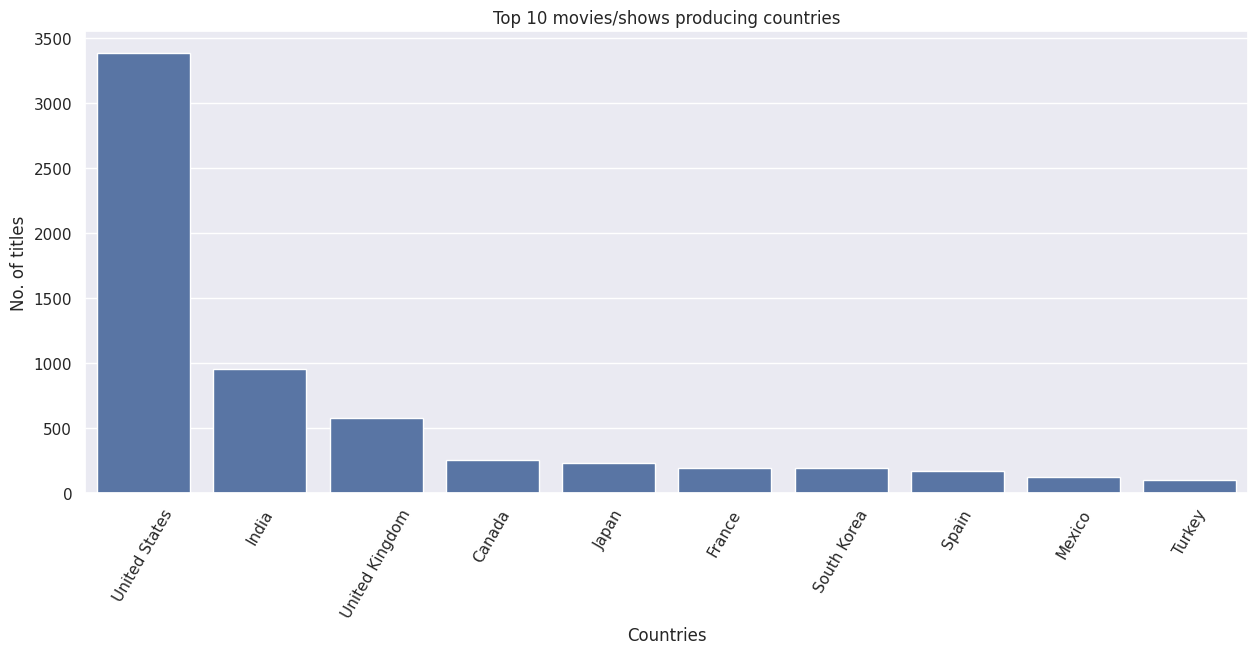

In [133]:
# Chart - 1 visualization code

df_country = net_flix_df.groupby(['country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,6))
plots= sns.barplot(y = 'title', x = 'country', data = df_country)
plt.xticks(rotation = 60)
plt.xlabel('Countries')
plt.ylabel('No. of titles')
plt.title('Top 10 movies/shows producing countries')
plt.show()

##### 1. Why did you pick the specific chart?

The primary reason for selecting a bar plot in this context is its effectiveness in visually representing the distribution of categorical data, particularly the primary filming country. Here's why a bar plot is well-suited:

The bar plot enables quick identification and comparison of countries with the highest number of shows. The length of each bar provides a clear visual indicator of the frequency of shows originating from each country.

By arranging the bars in descending order based on show counts, prominent countries are positioned at the top, aiding in rapid identification of major contributors.

A bar plot is an ideal choice for visualizing categorical variables such as the primary filming country. Each country is depicted by a distinct bar, facilitating straightforward comparison of show counts across different countries.

Viewers can easily read the y-axis values which shows counts corresponding to each country on the x-axis, ensuring accurate interpretation of the data distribution.

Examining the lengths of the bars allows immediate recognition of countries that play a significant role in Netflix content production.

##### 2. What is/are the insight(s) found from the chart?

The analysis of top countries with the highest number of shows offers valuable insights into Netflix's content distribution based on primary filming locations. Here are key insights derived from this data:

The United States takes the lead with the highest show count, indicating its significant contribution to Netflix's content library. This dominance is likely due to the robust entertainment industry in the U.S.

Countries such as India, the United Kingdom, Canada, and Japan also boast substantial show counts. This diverse array of content reflects Netflix's efforts to cater to varied viewer preferences and cultural backgrounds.

The presence of shows from diverse countries underscores Netflix's commitment to offering multilingual content and adapting shows for global audiences. This diversity aids in attracting and retaining a wide subscriber base.

Noteworthy contributions from countries like South Korea, Spain, and Mexico indicate the popularity of content from these regions. This trend reflects an increasing interest in international shows and a willingness to explore diverse cultural narratives.

The distribution of shows by country assists Netflix in tailoring content to specific regions and audience preferences. This targeted approach ensures a more personalized viewing experience.

Collaborations between countries contribute to higher show counts for certain regions. Co-productions allow for resource sharing and talent exchange, resulting in richer and more diverse content offerings.

The number of shows from each country also reflects Netflix's market penetration in those regions. Higher show counts often indicate a stronger presence and strategic focus on specific markets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

  Insights gained help Netflix make informed decisions about content strategies, acquisitions, and distribution, optimizing resource allocation and content appeal.

  Netflix's diverse content library across various countries can attract a global audience, driving positive growth by expanding its subscriber base worldwide.

  Understanding top contributing countries allows Netflix to create and acquire content that resonates with specific markets, leading to higher engagement and viewer satisfaction through localization.

  Content from diverse countries provides opportunities to cater to cultural and regional preferences, fostering inclusivity and deeper viewer connections.

  High show counts from specific countries signal successful partnerships and collaborations. Netflix can continue nurturing these relationships for co-productions and exclusive content, strengthening its market position.

* Potential Challenges and Negative Impact:

  Increased competition from other streaming platforms offering unique content from underrepresented regions may challenge Netflix's viewership. Lack of diversity could hinder differentiation.

  Depending too heavily on content from select countries, especially the United States, could result in market saturation. This saturation risks limiting appeal to a broader global audience.

  While localization is advantageous, there's a risk of cultural misalignment if content isn't accurately adapted. Insensitive content can lead to backlash and viewer attrition.

  The complexity and resource-intensive nature of producing and localizing content for multiple countries can strain budgets and operational efficiency.

  Over emphasis on countries with high show counts might overshadow content from regions with smaller contributions, limiting overall content diversity.

#### Chart - 2 Distribution of content available on Netflix among different type.

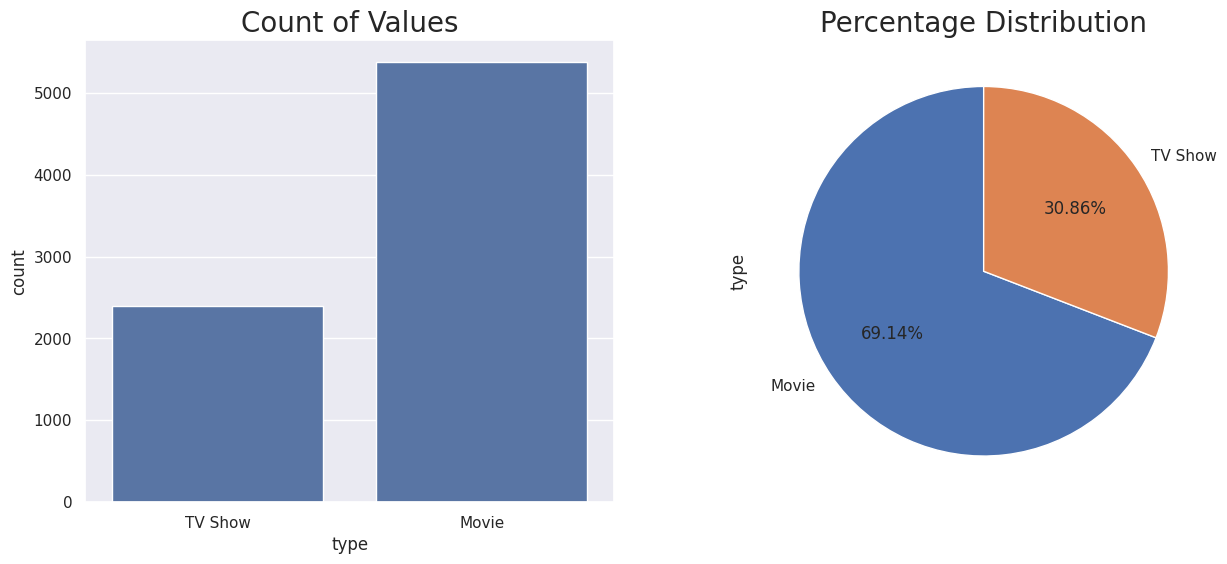

In [134]:
# Chart - 2 visualization code

fig,ax = plt.subplots(1,2, figsize=(14,5))

# countplot
graph = sns.countplot(x = 'type', data = net_flix_df, ax=ax[0])
graph.set_title('Count of Values', size=20)

# piechart
net_flix_df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], figsize=(15,6),startangle=90)
plt.title('Percentage Distribution', size=20)

plt.show()

##### 1. Why did you pick the specific chart?

We've opted for a countplot to display the precise tallies of "Movies" and "TV Shows." This provides a transparent comparison of the quantities of each content category in our dataset. Moreover, we've selected a pie chart to illustrate the percentage breakdown of these content classifications, enabling us to observe the ratio of movies to TV shows within the entire dataset.

##### 2. What is/are the insight(s) found from the chart?

- The majority of the content available on Netflix is in the form of "Movies."
- "TV Shows" constitute a smaller portion of the overall content on the platform.
- The pie chart provides a clear visual representation of the distribution, with "Movies" taking up a larger portion of the whole.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

1. Content Strategy: The insight that a larger portion of the content consists of "Movies" suggests that movies are more prevalent on the platform. This could inform content acquisition and production strategies, allowing Netflix to focus on obtaining popular and diverse movie titles to cater to a wider audience.

2. User Engagement: Understanding that "Movies" dominate the content catalog can help Netflix tailor its marketing and user engagement strategies. This insight could lead to targeted promotional campaigns for specific genres, leveraging the popularity of movies to attract and retain subscribers.

3. Retention Strategies: By knowing that movies are more abundant, Netflix can create customized recommendations and curated collections to enhance user engagement and satisfaction. Providing users with relevant movie suggestions could lead to increased usage and longer subscription durations.

**Negative Growth Insights:**

The provided visualizations do not directly indicate any insights that would lead to negative growth. However, it's important to note that the lack of "TV Shows" might imply a potential gap in certain content areas:

1. Diversity of Content: If the available "TV Shows" are limited in number or variety, there could be negative implications for subscribers who prefer TV series. They might find the content offerings lacking, potentially leading to lower satisfaction or churn.

2. Market Competitiveness: If competitors are offering a broader range of TV shows, Netflix might face challenges in attracting users who are specifically seeking TV series content. This could impact their market share.

3. Subscription Tier Optimization: Depending on user preferences, Netflix might need to optimize its subscription tiers. If users primarily prefer TV shows, they might expect more options in lower-cost tiers, which could affect the perceived value of subscriptions.

#### Chart - 3 Comparison of number of movies added each year on netflix

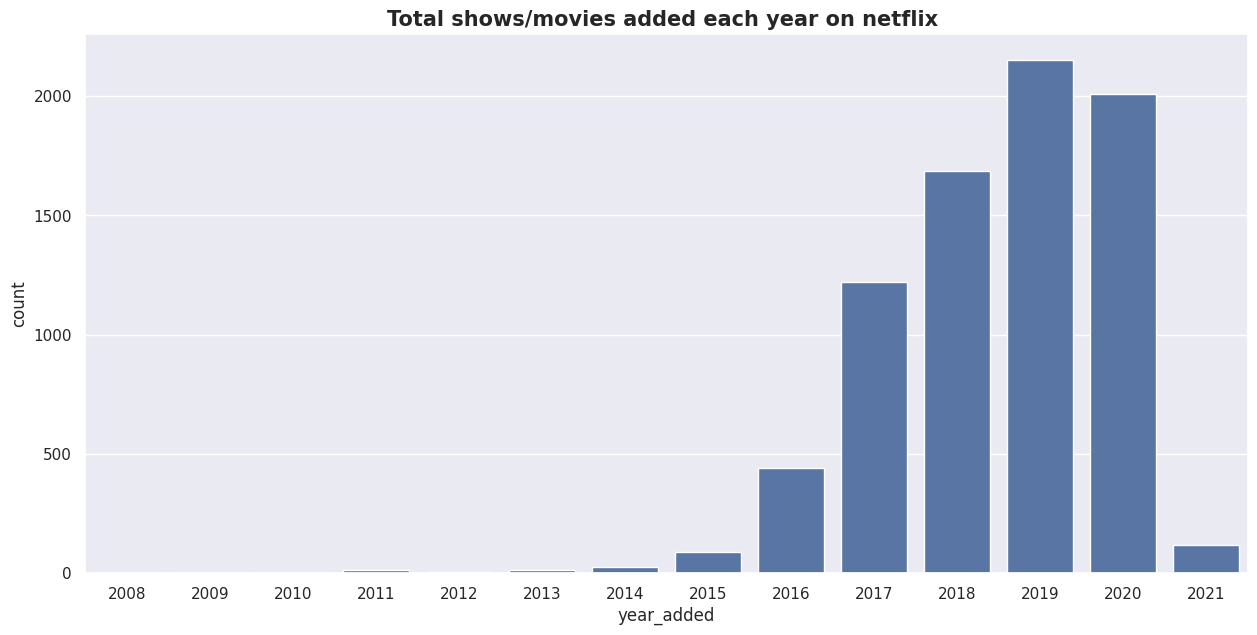

In [135]:
# Chart - 3 visualization code

sns.countplot(x='year_added',data= net_flix_df)

plt.title('Total shows/movies added each year on netflix ', size='15', fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

the countplot is a suitable choice for visualizing the distribution of shows/movies added to Netflix each year. It effectively presents the frequency of content additions for each year and enables easy comparison and interpretation of the data.

##### 2. What is/are the insight(s) found from the chart?

- Rapid Growth in Recent Years: The years 2019 and 2020 saw the highest numbers of content additions, with 2153 and 2009 shows/movies added, respectively. This indicates a period of rapid growth for Netflix's content library in recent years.

- Continued Expansion: Following 2019 and 2020, the year 2018 also had a substantial number of content additions, with 1685 shows/movies added. This suggests that Netflix's content expansion efforts have been consistent over multiple years.

- Steady Growth: The years 2017 and 2016 also had significant numbers of content additions, with 1225 and 443 shows/movies added, respectively. This indicates steady growth in Netflix's content library during those years.

- Recent Decline: In 2021, the number of content additions dropped to 117 shows/movies. While this could indicate a slowdown, it's important to note that the data might not be complete for the entire year, and trends can change throughout the year.

- Early Years: The years 2014 and earlier had lower numbers of content additions, suggesting that Netflix's content library was smaller in its early years of operation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

Content Library Growth: The rapid growth in content additions in recent years (2019 and 2020) indicates that Netflix is actively investing in expanding its content library. This can have a positive impact on user engagement, attracting new subscribers and retaining existing ones.

Subscriber Retention: Consistent content additions over multiple years (2017, 2018) contribute to subscriber satisfaction and retention. A diverse and growing content library can encourage users to stay subscribed.

Competitive Edge: Regular content updates give Netflix a competitive edge by offering a wider variety of content compared to competitors. This can attract viewers looking for a comprehensive entertainment experience.

Market Penetration: High content additions in recent years indicate Netflix's efforts to penetrate and capture a larger share of the global streaming market.

Original Content Strategy: The growth in content additions aligns with Netflix's strategy of producing original content. Original shows and movies can generate brand loyalty and exclusivity.

Potential Negative Impact:

Decline in Content Quality: A sudden drop in content additions in 2021 might suggest a decline in content quality or a shift in content strategy. If content additions continue to decrease, it could lead to viewer dissatisfaction and churn.

Subscription Attrition: A decline in content additions might result in users seeking content elsewhere, leading to subscription attrition or reduced acquisition of new subscribers.

Saturation Effect: Oversaturation of the content library can overwhelm viewers, making it difficult for them to choose what to watch. This could lead to viewer frustration and potentially reduced engagement.

Missed Opportunities: A lower number of content additions in earlier years might indicate missed opportunities to capture early adopters and establish a larger subscriber base from the beginning.

Increased Competition: If other streaming platforms continue to invest heavily in content additions, Netflix's reduced growth could lead to increased competition for viewer attention.

Lack of Freshness: A low number of content additions might result in a lack of freshness in the content library, potentially leading to viewer fatigue and decreased engagement.

#### Chart - 4 Distribution of content on the basis of the day of the month on which it was added

In [136]:
# Chart - 4 visualization code
# Create dataframe to store day values and count.
days_df = pd.DataFrame(net_flix_df.day_added.value_counts())
days_df.reset_index(inplace=True)
days_df.rename(columns={'index':'day', 'day_added':'count'}, inplace=True)

fig = px.bar(days_df, x="day", y="count", text_auto=True, color='count', color_continuous_scale=['#db0000', '#564d4d'])
fig.update_layout(
    title={
        'text': 'Which days are more prominent',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=600)
fig.show()

##### 1. Why did you pick the specific chart?

the bar chart is a suitable choice for this visualization because it effectively displays the distribution of content additions across days of the month and allows for easy comparison and interpretation of the data.

##### 2. What is/are the insight(s) found from the chart?

* Weekdays Dominate: Weekdays (days 1 to 5) have significantly higher content additions compared to weekends (days 6 and 7). This suggests that content is added more frequently during weekdays.

* Day 1 Peak: day 1 has the highest count of content additions (2069). This suggests a potential trend of adding new content at the beginning of the week.

* Mid-Month Peaks: Days around the 15th of the month (days 15 and 16) have relatively high content additions (644 and 240, respectively). This could indicate a trend of content additions around the middle of the month.

* End-of-Month Surges: Days at the end of the month (days 31, 30, and 31) also show relatively higher content additions (274, 182, and 130, respectively). This could be related to content releases before the end of the month.

* Variation on Weekends: Days 6 and 7 (Saturday and Sunday) have lower content additions (165 and 162, respectively), suggesting a potential strategy of focusing less on weekends.

* Consistency in Numbers: Days in the mid-range (days 18 to 28) show consistent content additions, indicating a steady flow of new content throughout the month.

* Influence of Viewer Behavior: The higher content additions at the beginning and middle of the month might reflect viewer behavior patterns, such as higher engagement after weekends and around mid-month paydays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

1. Strategic Content Releases: The insights into days with higher content additions (e.g., Mondays, mid-month, end-of-month) can be leveraged for strategic content releases. By concentrating major releases during these periods, Netflix can maximize viewer engagement and subscriptions.

2. Optimized User Engagement: Aligning content releases with days of the week when users are most active (e.g., weekdays) can lead to optimized user engagement and longer subscription durations. Users are more likely to engage when there's fresh content available.

3. Viewer Satisfaction: Consistent content additions throughout the week can enhance viewer satisfaction. Offering a steady stream of new content prevents content gaps and provides viewers with reasons to keep using the platform.

4. Content Variety: Analyzing specific days with lower content additions (e.g., weekends) could be an opportunity to diversify content and cater to different viewer preferences during those times.

**Potential Negative Impact:**

1. Neglecting Weekends: Overemphasizing weekdays for content additions might lead to neglecting weekends. If users experience a lack of new content during leisure days, they might become dissatisfied and consider canceling subscriptions.

2. Viewer Fatigue: Concentrating content additions on specific peak days (e.g., Mondays) might result in viewer fatigue. Releasing too much content all at once could lead to oversaturation and reduced engagement.

3. Content Quality Over Quantity: Focusing solely on aligning content additions with specific days could compromise content quality. It's important to ensure that content releases maintain high quality to retain viewer satisfaction.

4. Neglecting Viewer Diversity: Viewer behavior varies widely, and not all users follow the same patterns. Relying exclusively on the insights from certain days might overlook segments of users with different preferences and schedules.

5. Competition: If other streaming platforms also follow similar patterns of concentrated content releases, it could lead to increased competition for viewers' attention, potentially resulting in a fragmented audience.

#### Chart - 5 Growth in number of TV Shows/Movies with years

In [140]:
# Chart - 5 visualization code
# Filter data by type (TV Show or Movie)
tv_show = net_flix_df[net_flix_df["type"] == "TV Show"]
movie = net_flix_df[net_flix_df["type"] == "Movie"]

col = "year_added"

# Count content added each year for TV Shows and Movies
content_1 = tv_show[col].value_counts().reset_index()
content_1 = content_1.rename(columns={col: "count", "index": col})
content_1 = content_1.sort_values(col)

content_2 = movie[col].value_counts().reset_index()
content_2 = content_2.rename(columns={col: "count", "index": col})
content_2 = content_2.sort_values(col)

# Create traces for TV Shows and Movies
trace1 = go.Scatter(x=content_1[col], y=content_1["count"], name="TV Shows", marker=dict(color="#db0000"))
trace2 = go.Scatter(x=content_2[col], y=content_2["count"], name="Movies", marker=dict(color="#564d4d"))

data = [trace1, trace2]
layout = go.Layout(title="Content Added Over the Years", xaxis=dict(title="Year"),
    yaxis=dict(title="Count"), legend=dict(x=0.4, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)

# Display the figure (if using show)
fig.show()

##### 1. Why did you pick the specific chart?

The choice of chart in the code you provided is a line chart (specifically, a scatter plot with connected lines) to visualize the growth of content (TV shows and movies) over the years. Here's why this choice of chart might be suitable:

1. Temporal Data: The x-axis represents years, which is a continuous variable and can be effectively shown using a line chart. Line charts are often used to display trends over time.

2. Comparison: The line chart allows you to compare the growth of TV shows and movies side by side. Each line represents a content type, making it easy to observe the trends and differences.

3. Connected Data Points: In your code, you've used a scatter plot with connected lines. This is a good choice when you have discrete data points (years) but still want to show the trend between them.

4. Multiple Series: You have two data series (TV shows and movies) that you want to compare. Line charts are well-suited for displaying multiple series on the same graph.

5. Year-to-Year Change: Line charts are effective for showing changes in data over time. You can quickly see if there are any spikes or drops in content added during certain years.

##### 2. What is/are the insight(s) found from the chart?

**TV Shows:**

* There was a small amount of TV show content added in the early years (2008 to 2010), possibly indicating the beginning of Netflix's original content creation.
* A notable increase in TV show additions started around 2015, which continued to grow in the subsequent years.
* The highest growth in TV show content occurred from 2016 to 2020, with a peak of 697 TV shows added in 2020.
* There seems to be a significant drop in TV show additions in 2021 compared to the previous years.

**Movies:**

* Similar to TV shows, the earliest years (2008 to 2010) saw a relatively small number of movie additions.
* There's a noticeable increase in movie additions starting from 2014, with a more significant rise in 2016.
* The growth trend continues from 2016 to 2019, with the highest number of movies (1497) added in 2019.
* Movie additions show a slight decline in 2020, followed by a relatively higher number of additions in 2021.

**Overall Insights:**

* Both TV shows and movies exhibit a growth trend over the years, with significant expansion starting around 2015-2016.
* The years 2018 and 2019 appear to be particularly active in terms of content additions for both TV shows and movies.
* The drop in content additions in 2020 might be attributed to factors like production delays caused by the COVID-19 pandemic.
* The lower number of additions in 2021 for both TV shows and movies could indicate a potential shift in strategy or the impact of ongoing circumstances.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

1. Strategic Decision-Making: The insights into the years of significant growth (such as 2018-2019) can help Netflix understand what strategies, content acquisitions, or original productions were successful during those periods. This information can guide future decision-making to replicate and build upon those successes.

2. Content Investment: Identifying trends in content growth can help Netflix allocate resources more effectively. For instance, if TV shows have shown consistent growth, Netflix might choose to invest more in producing and acquiring TV show content, targeting genres and themes that have proven popular.

3. Subscriber Retention and Attraction: Consistent content growth can be a driver for subscriber retention and acquisition. New and diverse content attracts and retains subscribers, potentially reducing churn rates.

4. Global Events Impact: The drop in content additions in 2020 can be attributed to the COVID-19 pandemic, which disrupted production schedules worldwide. This insight can be useful for understanding the impact of external events on content availability and setting expectations for subscribers during such periods.

**Potential Negative Impact:**

1. Decline in Content Additions: The drop in content additions in 2021, both for TV shows and movies, could potentially lead to a decrease in subscriber engagement and retention. Users often expect a steady stream of fresh content, and a sudden drop could result in dissatisfaction.

2. Competition and Variety: The consistent growth in content could lead to oversaturation and reduced audience engagement if the content quality or variety isn't maintained. Users may become overwhelmed with choices, and competitors might offer content that better aligns with specific tastes.

3. Production Delays: Production delays due to unforeseen events, as seen in 2020, could lead to lower content availability. This could negatively impact user engagement and satisfaction, potentially affecting subscription renewals.

4. Content Quality: While the insights provided do not directly touch upon content quality, it's important to consider that growth should be accompanied by maintaining high-quality content. If content additions are made solely to meet quantity targets without considering quality, it could lead to dissatisfaction among subscribers.

#### Chart - 6 Top 10 and last 10 genre present in listed in column in Dataset

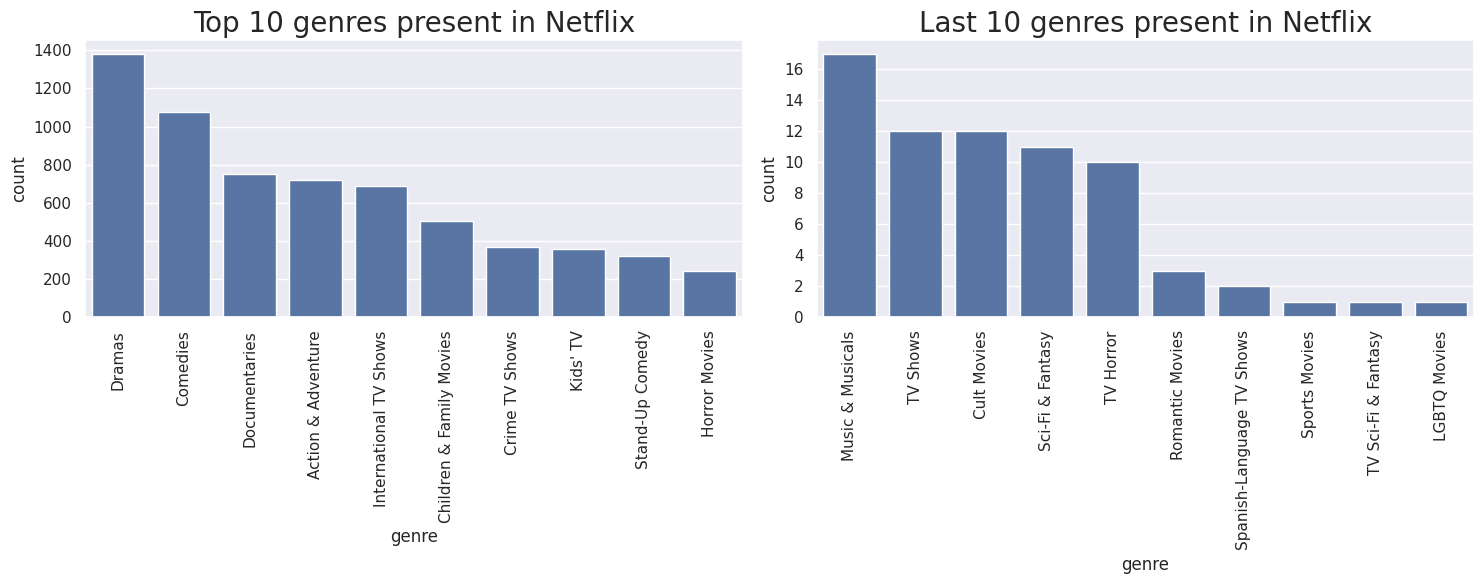

In [146]:
# Chart - 6 visualization code

# seperating genre from listed_in columns for analysis purpose
genres = net_flix_df['listed_in'].str.split(', ', expand=True).stack()
# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})

# plotting graph
fig,ax = plt.subplots(1, 2, figsize= (15, 6))

# Top 10 genres
top = sns.barplot(x= 'genre', y = 'count', data= genres[:10], ax= ax[0])
top.set_title('Top 10 genres present in Netflix', size= 20)
plt.setp(top.get_xticklabels(), rotation= 90)

# Last 10 genres
bottom = sns.barplot(x= 'genre', y = 'count', data= genres[-10:], ax= ax[1])
bottom.set_title('Last 10 genres present in Netflix', size= 20)
plt.xticks(rotation= 90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The choice of using a bar plot (bar chart) in the provided code is appropriate for visualizing the distribution of genres in the "listed_in" column of the Netflix dataset. Here's why a bar plot is a suitable choice for this visualization:

1. Categorical Data: The genres extracted from the "listed_in" column are categorical data. A bar plot is commonly used to represent the distribution of categorical data.

2. Comparison: Bar plots are ideal for comparing the frequency or count of different categories. In this case, you're comparing the count of each genre.

3. Ordered Data: The x-axis represents genres, and you're interested in understanding their relative frequencies. The x-axis categories don't need to be sorted, but a bar plot can still accommodate unsorted categorical data.

##### 2. What is/are the insight(s) found from the chart?

**Top 10 Genres:**

1. Diverse Genre Offerings: The top genres include a variety of content, ranging from dramas, comedies, documentaries, and action & adventure. This diversity reflects Netflix's efforts to cater to a wide range of viewer preferences.

2. Mainstream Appeal: Genres like dramas, comedies, and documentaries have a high count, indicating their popularity and mainstream appeal among viewers.

3. Global Audience: The presence of "International TV Shows" in the top genres suggests that Netflix has a strong focus on providing content from various countries, appealing to a global audience.

4. Family and Kids' Content: The presence of "Children & Family Movies," "Kids' TV," and "Animation" genres indicates a commitment to offering family-friendly content.

5. Entertainment Variety: Genres like "Stand-Up Comedy" and "Music & Musicals" add entertainment variety, addressing different moods and preferences.

**Last 10 Genres:**

1. Niche and Specialized Content: The genres in the last 10 list, such as "Cult Movies," "TV Horror," and "Sci-Fi & Fantasy," tend to be more specialized and might cater to niche audiences.

2. Limited Appeal: Genres with lower counts, such as "LGBTQ Movies," "Sports Movies," and "Spanish-Language TV Shows," suggest that these genres might have limited appeal compared to more mainstream genres.

3. Highly Specific Content: The genres "TV Sci-Fi & Fantasy" and "TV Horror" are specific subgenres that might cater to fans of these particular genres.

4. Limited Availability: Some genres with very low counts (e.g., "Sports Movies") might indicate that Netflix offers limited content within those genres.

5. Viewer Diversity: The presence of genres like "TV Shows" and "Romantic Movies" suggests that Netflix aims to cater to diverse viewer interests, even if these genres have lower counts.

6. Content Focus: Lower counts in some genres might reflect a strategic decision to focus resources on more popular and mainstream genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

1. Viewer Engagement: Offering a diverse range of popular genres (e.g., dramas, comedies, documentaries) can lead to higher viewer engagement, longer viewing sessions, and increased subscription renewals.

2. Global Audience: The inclusion of "International TV Shows" reflects Netflix's commitment to catering to a global audience. This can lead to a broader user base and positive business impact through increased international subscriptions.

3. Family-Friendly Content: Providing genres like "Children & Family Movies" and "Kids' TV" can attract families and parents, resulting in higher subscriptions and positive word-of-mouth recommendations.

4. Entertainment Variety: Offering a mix of genres, including "Stand-Up Comedy" and "Music & Musicals," can attract viewers seeking different types of entertainment, leading to longer engagement on the platform.

5. Catering to Niche Audiences: While some genres have lower counts, they might cater to niche audiences with passionate fan bases. Satisfying these niche audiences can lead to increased loyalty and positive reviews.

**Potential Negative Impact:**

1. Neglected Genres: Overemphasis on popular genres could lead to neglecting genres with lower counts. This might result in decreased engagement from viewers who prefer these genres.

2. Oversaturation: Overemphasizing the most popular genres might lead to oversaturation, causing viewers to become overwhelmed with content choices and potentially reducing engagement.

3. Limited Niche Content: While catering to niche audiences is valuable, focusing solely on niche genres might limit overall viewership and potentially result in negative growth if those genres don't have a sustainable audience.

4. Quality Over Quantity: Prioritizing quantity over quality in certain genres could lead to viewer dissatisfaction, negative reviews, and potential churn.

5. Missed Opportunities: Neglecting certain genres (e.g., LGBTQ Movies, Spanish-Language TV Shows) might miss opportunities to capture specific viewer segments, potentially leading to negative growth within those segments.

6. Competition: If certain genres are neglected or not well-curated, viewers might turn to other streaming platforms that offer more diverse and tailored genre options.

#### Chart - 7 Number of TV Shows/Movies having different ratings  (Bivariate)

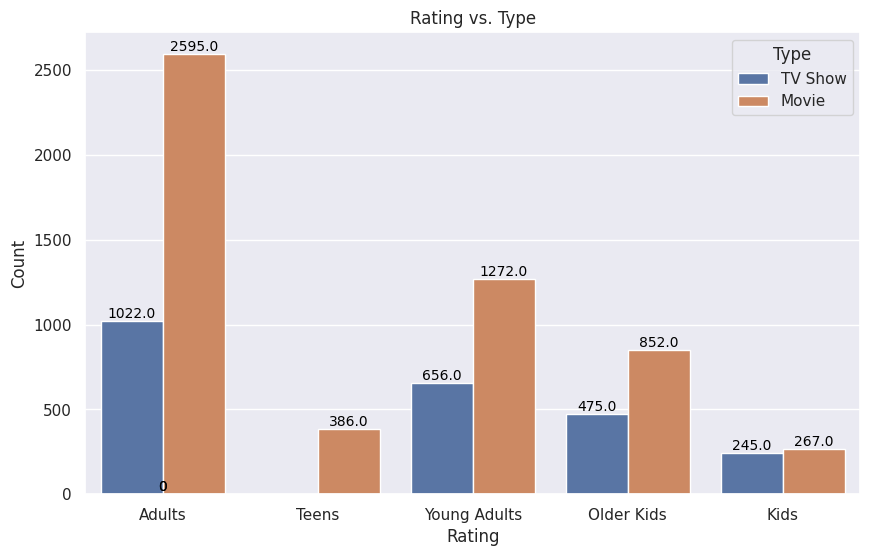

In [150]:
# Chart - 7 visualization code

# Rating vs. Type (Grouped bar chart)
plt.figure(figsize=(10, 6))
sns.countplot(x="rating", hue="type", data=net_flix_df)
plt.title("Rating vs. Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.legend(title="Type")

# Print count values on the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center',
                va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is a type of bar plot that is specifically designed to show the count of occurrences of a categorical variable. It is particularly useful when you want to visualize the distribution of categorical data and compare the frequency of different categories.

##### 2. What is/are the insight(s) found from the chart?

* For the "Adults" rating, there are significantly more movies (2595) compared to TV shows (1025). However, for the "Teens" rating, there are only movies (386) and no TV shows.
* The "Young Adults" rating has a relatively balanced distribution between movies (1272) and TV shows (659), indicating a diverse range of content for this category.

* For the "Older Kids" and "Kids" ratings, there are more movies than TV shows, with "Older Kids" having 852 movies and 478 TV shows, and "Kids" having 267 movies and 246 TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impacts:**

1. Dominant Content Types: The insight that certain content ratings are dominant in specific content types (e.g., "Adults" rating having more movies) can help Netflix allocate resources more effectively. For example, producing more content within popular rating categories could attract and retain subscribers who prefer those ratings, leading to positive growth.

2. Balanced Distribution: The balanced distribution of the "Young Adults" rating between movies and TV shows indicates that there's a diverse audience within that age group. Offering a variety of content types can lead to higher engagement and satisfaction among different segments of viewers.

**Negative Impacts:**

1. Limited TV Shows for Certain Ratings: The absence of TV shows for the "Teens" rating might result in a missed opportunity to attract younger viewers looking for TV show content. This could lead to negative growth in the teenage demographic if not addressed.

2. Children's Content: The higher count of movies compared to TV shows in the "Older Kids" and "Kids" categories might limit the options available to younger audiences who prefer TV shows. This could result in negative growth among families seeking TV show content for children.

#### Chart - 8 TV Shows distribution on basis of seasons

In [152]:
# Chart - 8 visualization code

tv_df = net_flix_df[net_flix_df['type']=='TV Show']
tv_df['duration'].value_counts()

tv= tv_df['duration'].value_counts().T.reset_index()

fig = px.pie(tv, values= 'duration', names= 'index')
fig.update_layout(title= 'TV Shows distribution on basis of seasons')
fig.update_traces(textposition= 'inside', textinfo= 'percent+label',
                  textfont_size= 20, marker= dict( line= dict(color= 'RebeccaPurple', width= 2)))

##### 1. Why did you pick the specific chart?

a pie chart is a suitable choice for visualizing the distribution of TV shows on Netflix based on the number of seasons. It effectively conveys the proportion of TV shows within each season category and allows viewers to compare these proportions visually.

##### 2. What is/are the insight(s) found from the chart?

1. Diverse Content Strategy: Netflix has a diverse content strategy that includes a mix of single-season shows and multi-season shows. This strategy allows them to cater to a wide range of viewer preferences and consumption habits.

2. Emphasis on Shorter Formats: The dominance of single-season shows suggests that Netflix invests in producing shorter formats like mini-series and limited series. These formats might be more appealing to viewers who prefer concise storytelling.

3. Variety in Multi-Season Shows: The presence of multi-season shows in different ranges (2-3, 4-6, etc.) indicates that Netflix offers a variety of ongoing series and shows that explore longer story arcs.

4. Viewer Engagement with Long-Running Shows: Although rare, the presence of TV shows with higher numbers of seasons suggests that there are shows on Netflix that have managed to maintain viewer engagement over a significant period.

5. Impact of Production and Costs: The decreasing frequency as the number of seasons increases could be influenced by production costs and viewer engagement. Longer-running shows require sustained resources and consistent audience interest.

6. Balance between Quantity and Quality: The distribution might reflect Netflix's approach to balance the quantity of content with the quality of storytelling. This can ensure that both shorter and longer shows maintain a certain level of engagement and production value.

7. Changing Viewer Preferences: The gaps in the distribution might indicate changing viewer preferences. The absence of mid-range shows (7-9 seasons) could be due to viewer interest shifting toward shorter or longer formats.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

1. Content Diversity: The diverse distribution of TV shows across different numbers of seasons indicates that Netflix is catering to a wide range of viewer preferences. This diversity can attract and retain a broader audience, leading to positive business impact.

2. Viewer Engagement: The presence of TV shows with higher numbers of seasons suggests that some shows have successfully maintained viewer engagement over the long term. These engaged viewers contribute to positive word-of-mouth, loyalty, and potentially higher subscriber retention rates.

3. Data-Informed Renewals: The insights gained from this distribution can inform content renewal decisions. Shows with strong engagement and consistent viewer interest can be renewed for additional seasons, leading to sustained viewer satisfaction.

4. Appeal to Different Viewers: By offering both single-season and multi-season shows, Netflix can attract viewers with varying preferences. Some viewers prefer short, self-contained stories, while others enjoy longer narrative arcs.

5. Platform Stickiness: A diverse content library with shows of different lengths can make Netflix more "sticky" for subscribers. Subscribers might stay engaged for a longer time as they explore a variety of content.

**Potential Negative Impact:**

1. Overemphasis on Short Formats: If Netflix focuses excessively on producing single-season shows, it could result in a lack of long-running, ongoing series. This might lead to viewer dissatisfaction if subscribers are seeking shows with more extended storylines.

2. Content Fatigue: A skewed distribution with a majority of single-season shows might lead to content fatigue, as viewers may find it challenging to invest in shorter formats repeatedly. This could potentially impact viewer engagement and retention.

3. Risk of Abandoning Shows: If Netflix doesn't renew shows with potential for longevity, it might miss out on cultivating dedicated fan bases and long-term viewer engagement. Prematurely discontinuing shows could lead to subscriber disappointment.

#### Chart - 9 Top TV Shows/Movies directors on basis of number of TV Shows/Movies directed

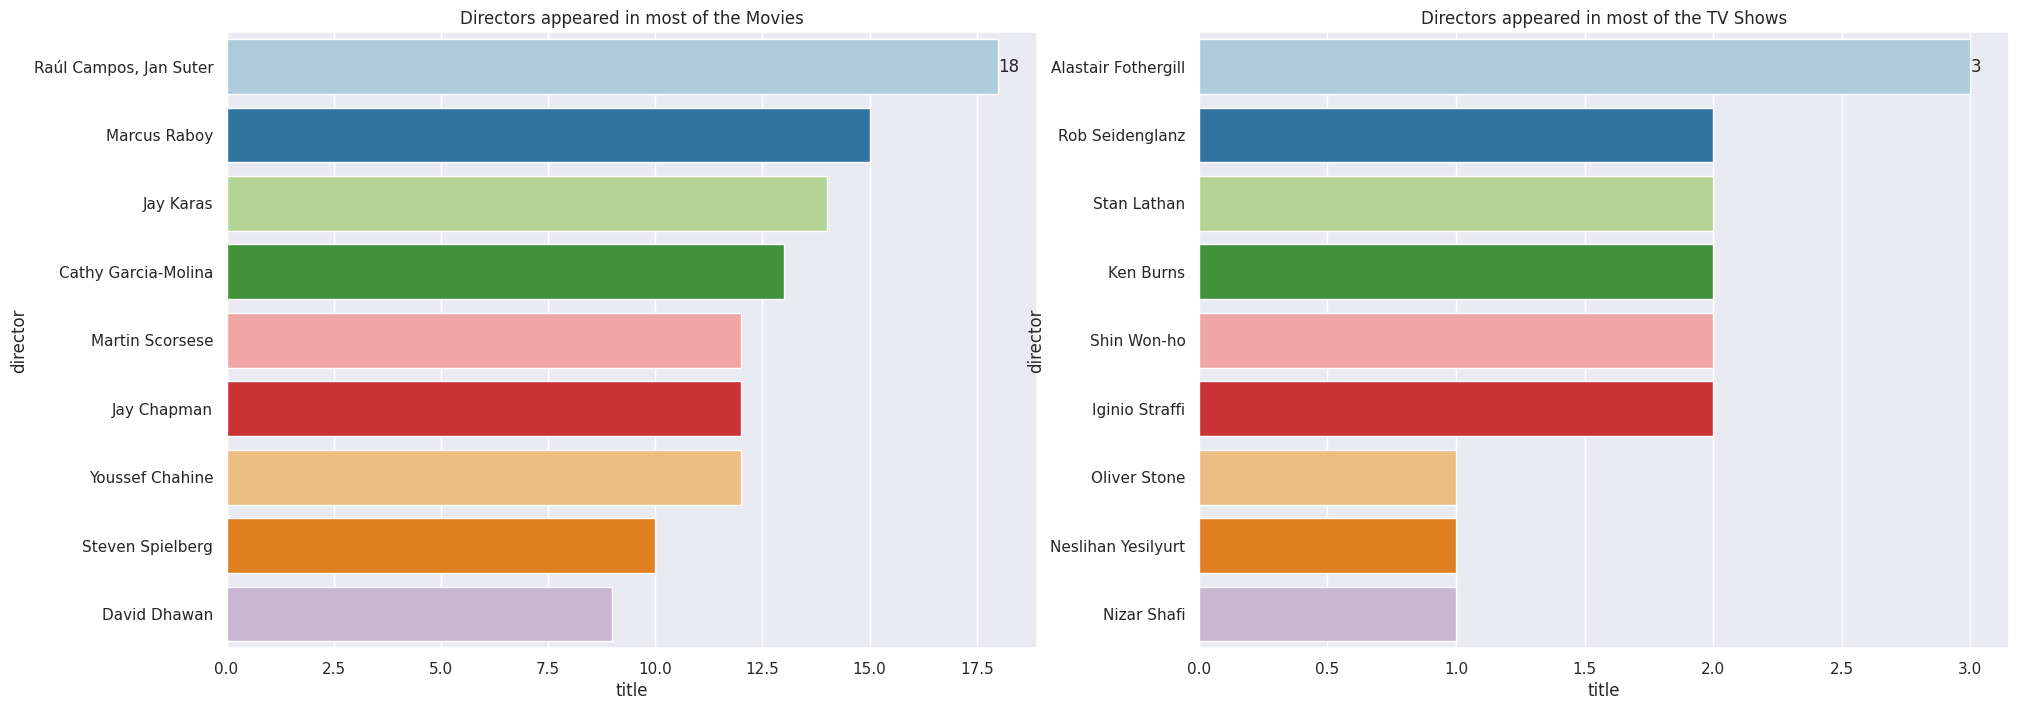

In [154]:
# Chart - 9 visualization code

# Top TV Shows/Movies directors on basis of number of TV Shows/Movies directed

df_movies= net_flix_df[net_flix_df['type']== 'Movie']
df_tvshows= net_flix_df[net_flix_df['type']== 'TV Show']
plt.figure(figsize=(23,8))
for i,j,k in ((df_movies, 'Movies',0),(df_tvshows, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  df_director = i.groupby(['director']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[1:10]
  plots= sns.barplot(y = "director",x = 'title', data = df_director, palette='Paired')
  plt.title(f'Directors appeared in most of the {j}')
  plots.bar_label(plots.containers[0])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***